In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from ipynb.fs.full.Inputs import curate
from ipynb.fs.full.Inputs import limpiar_moneda
from ipynb.fs.full.Inputs import color_rojo

In [2]:
valid = '1234567890.' 
def curate(data):
    return float(''.join(filter(lambda char: char in valid, data)))


In [16]:
paises = pd.read_csv('economic_freedom_index2019_data.csv', encoding='latin-1')

#paises['GDP (Billions, PPP)']=paises['GDP (Billions, PPP)'].replace({'\$':'','\D':''}, regex = True)
#paises['GDP per Capita (PPP)']=paises['GDP per Capita (PPP)'].replace({'\$':'','\D':''}, regex = True)
#paises['GDP (Billions, PPP)']=paises['GDP (Billions, PPP)'].str.replace(r"\(.*\)","")
#paises['Unemployment (%)']=paises['Unemployment (%)'].replace({'\$':'','\D':''}, regex = True)
#paises['FDI Inflow (Millions)']=paises['FDI Inflow (Millions)'].replace({'\$':'','\D':''}, regex = True)
#paises['GDP (Billions, PPP)']=paises['GDP (Billions, PPP)'].astype(float)
#paises['Population (Millions)']=paises['Population (Millions)'].apply(curate)
#paises['Unemployment (%)']=paises['Unemployment (%)'].astype(float)
#paises['FDI Inflow (Millions)']=paises['FDI Inflow (Millions)'].apply(curate)
#paises['GDP per Capita (PPP)']=paises['GDP per Capita (PPP)'].astype(float)

del paises['WEBNAME']
del paises['Country Name']
#del paises['CountryID']
paises.loc[paises['Country'] == 'Liechtenstein', ['Population (Millions)']] = 0.038

paises.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Region                       186 non-null    object 
 2   World Rank                   180 non-null    float64
 3   Region Rank                  180 non-null    float64
 4   2019 Score                   180 non-null    float64
 5   Property Rights              185 non-null    float64
 6   Judical Effectiveness        185 non-null    float64
 7   Government Integrity         185 non-null    float64
 8   Tax Burden                   180 non-null    float64
 9   Gov't Spending               183 non-null    float64
 10  Fiscal Health                183 non-null    float64
 11  Business Freedom             185 non-null    float64
 12  Labor Freedom                184 non-null    float64
 13  Monetary Freedom    

### Top 10 paises con mejor y peor puntuacion, observemos cuantas veces se repiten estos nombres a lo largo del estudio. El ranking con las mejores puntuaciones denota una fuerte influencia cultural proveniente del reino unido, esto se ve reflejado en HK, Nueva Zelanda, Australia o Singapur, en Europa destaca Irlanda, la propia Uk y Suiza.
### Por otro lado en el ranking de paises con peor puntuacion vemos dos patrones, paises subsaharianos y dictaduras sin ninguna apertura, asi Cuba, Venezuela o Corea del Norte encabezan este ranking.

In [4]:
e=paises[['Country','Region','2019 Score']].sort_values(by='2019 Score', ascending=False)
e=e.dropna()
print(e.head(10))
print(e.tail(10))

                  Country                        Region  2019 Score
72          Hong Kong SAR                  Asia-Pacific        90.2
149             Singapore                  Asia-Pacific        89.4
122           New Zealand                  Asia-Pacific        84.4
160           Switzerland                        Europe        81.9
6               Australia                  Asia-Pacific        80.9
79                Ireland                        Europe        80.5
176        United Kingdom                        Europe        78.9
29                 Canada                      Americas        77.7
175  United Arab Emirates  Middle East and North Africa        77.6
162               Taiwan                   Asia-Pacific        77.3
                Country                        Region  2019 Score
2               Algeria  Middle East and North Africa        46.2
166         Timor-Leste                  Asia-Pacific        44.2
18              Bolivia                      Americas 

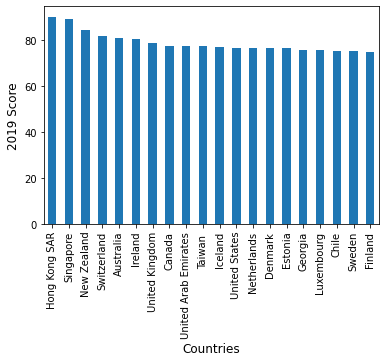


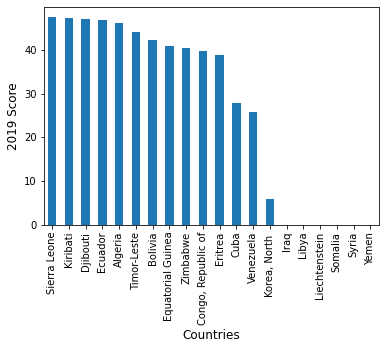

### Gracias a la grafica de barras podemos observar de manera rapida donde se situa cada pais. La grafica de los paises mejor rankeados posee dos factores 

###  Vemos las regiones segmentadas por su puntuacion, minima, maxima y su media. 
### Aunque la media puede ser muy ajustada se deberia realizar estudios mas profundos para comprobar los valores dispares de la media, las dictaduras distorsionan las medias.

In [5]:
a=paises.groupby('Region')['2019 Score'].agg('min') , paises.groupby('Region')['2019 Score'].agg('max'), paises.groupby('Region')['2019 Score'].agg('mean')
a

(Region
 Americas                        25.9
 Asia-Pacific                     5.9
 Europe                          52.3
 Middle East and North Africa    46.2
 Sub-Saharan Africa              38.9
 Name: 2019 Score, dtype: float64,
 Region
 Americas                        77.7
 Asia-Pacific                    90.2
 Europe                          81.9
 Middle East and North Africa    77.6
 Sub-Saharan Africa              73.0
 Name: 2019 Score, dtype: float64,
 Region
 Americas                        59.600000
 Asia-Pacific                    60.634884
 Europe                          68.627273
 Middle East and North Africa    61.257143
 Sub-Saharan Africa              54.182979
 Name: 2019 Score, dtype: float64)

In [6]:
paises[paises['Region']=='Middle East and North Africa'].sort_values(by='2019 Score', ascending=False);

## ¿Existe correlacion entre el PIB per capita y el indice de 2019?

In [7]:
paises['GDP per Capita (PPP)']=paises['GDP per Capita (PPP)'].replace({'\$':'','\D':''}, regex = True)

paises['GDP per Capita (PPP)']=paises['GDP per Capita (PPP)'].astype(float)


In [8]:
paises[['Region','Country','2019 Score','GDP per Capita (PPP)']].sort_values(by='GDP per Capita (PPP)', ascending=False).head(30)


,Region,Country,2019 Score,GDP per Capita (PPP)
99,Europe,Liechtenstein,NaN,1.391002e+09
88,Asia-Pacific,"Korea, North",5.9,1.700202e+07
136,Middle East and North Africa,Qatar,72.6,1.245290e+05
102,Asia-Pacific,Macau,71.0,1.116290e+05
101,Europe,Luxembourg,75.9,1.063740e+05
149,Asia-Pacific,Singapore,89.4,9.390600e+04
22,Asia-Pacific,Brunei Darussalam,65.1,7.819600e+04
79,Europe,Ireland,80.5,7.553800e+04
126,Europe,Norway,73.0,7.183100e+04
175,Middle East and North Africa,United Arab Emirates,77.6,6.774100e+04


### Al transformar los valores en decimales se descomponen mientras que el valor se mantiene con la excepcion de Corea del Norte y Liechenstein. Se observa que no hay ningun valor por debajo de la puntuacion 60

In [9]:
paises[['Region','Country','2019 Score','GDP per Capita (PPP)']].sort_values(by='GDP per Capita (PPP)', ascending=False).tail(30)

,Region,Country,2019 Score,GDP per Capita (PPP)
173,Sub-Saharan Africa,Uganda,59.7,2354.0
32,Sub-Saharan Africa,Chad,49.9,2344.0
185,Sub-Saharan Africa,Zimbabwe,40.4,2283.0
16,Sub-Saharan Africa,Benin,55.3,2277.0
108,Sub-Saharan Africa,Mali,58.1,2170.0
56,Sub-Saharan Africa,Ethiopia,53.6,2161.0
152,Asia-Pacific,Solomon Islands,54.6,2157.0
139,Sub-Saharan Africa,Rwanda,71.1,2080.0
67,Sub-Saharan Africa,Guinea,55.7,2041.0
87,Asia-Pacific,Kiribati,47.3,1976.0


### Por lo contrario, en el top 30 de paises peor puntuados ninguno tiene una puntuacion que alcance los 60 puntos,  la mayoria situados en la Africa subsahariana y con gobiernos poco transparentes o democraticos.

In [10]:
paises.corr(method='pearson');

### Mapa entero de las correlaciones, paso a resaltar con rojo aquellas relaciones fuertes negativas (considerando fuerte por encima del 75%). Esto quiere decir que cuanto mayor sea este valor mayor efecto opuesto lograra. Como anecdota reseñare que cuanta mayor integridad gubernamental posea peor ranking mundial tendra 

In [11]:

paises.corr().style.applymap(color_rojo);


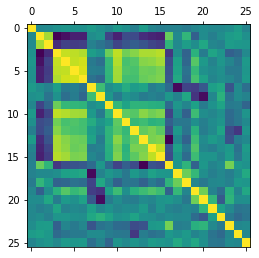

### Mapa con las correlaciones de todo el CSV, la unica igualdad 1-1 son aquellos valores consigo mismo 

In [13]:
c= paises.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so;

In [14]:
e=paises.corr().abs()
sol = (e.where(np.triu(np.ones(e.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
for index, value in sol.items():
    if value > 0.75:
        index == '2019 Score'
        e=print(index , value)
e

('Trade Freedom', 'Tariff Rate (%)') 0.951382572390145
('World Rank', '2019 Score') 0.9383277957206231
('Tax Burden', 'Income Tax Rate (%)') 0.8980476285947
("Gov't Spending", "Gov't Expenditure % of GDP ") 0.8876070120393463
('Judical Effectiveness', 'Government Integrity') 0.8786787446344492
('World Rank', 'Property Rights') 0.8622618197607061
('Property Rights', 'Government Integrity') 0.855427764219471
('2019 Score', 'Property Rights') 0.8304094531928936
('Property Rights', 'Judical Effectiveness') 0.8224451696929009
('Investment Freedom ', 'Financial Freedom') 0.8145066692614067
('2019 Score', 'Business Freedom') 0.8125232546333371
('2019 Score', 'Judical Effectiveness') 0.804253120263036
('2019 Score', 'Financial Freedom') 0.7900316163072166
('World Rank', 'Judical Effectiveness') 0.7835095799832278
('World Rank', 'Financial Freedom') 0.7821365788496775
('World Rank', 'Government Integrity') 0.7770582358708698
('Property Rights', 'Business Freedom') 0.7769425865095183
('World Ran

### Tras realizar una correlacion de Pearson a todo el dataset se ha filtrado la matriz sustituyendola por sus valores absolutos, despreciando los valores homogeneos (puesto que se habia comprobado que no habia correlacion 1-1 mas alla de los valores consigo mismo), ademas he utilizado un filtro que solo nos muestra los valores por encima de 75% despreciando asi las correlaciones inferiores a ese porcentaje

### Ciñendonos al valor "2019 Score"  observamos que sus correlaciones mas fuertes son con el derecho a la propiedad, la libertad empresarial, la efectividad  judicial, la libertad financiera , la integridad del gobierno, la libertad para invertir y la libertad para comerciar.
        


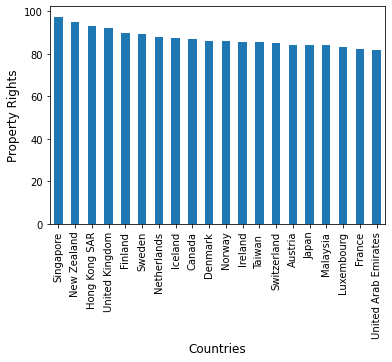

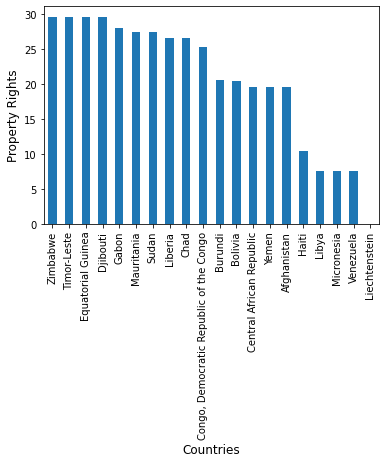

### Gracias a haber comprobado que el derecho a la propiedad privada y la puntuacion de libertad economica era una de las correlaciones mas fuertes deseaba poder estudiar los nombress de una manera mas visual, todos los paises que encabezan el ranking poseen un derecho a la propiedad muy parejo entre si, todas ellas disfrutan de puntuaciones muy elevadas y de un pib per capita alto.

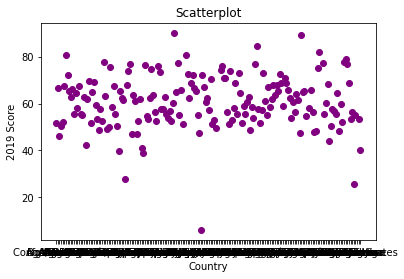

### La mayoria de paises se encuentran en el intervalo superior a 40 y menor a 80, observamos como son  muy escasos los valores por debajo de 40, estos paises ademas padecen dictaduras o guerras que les impiden estabilizarse y progresar (Venezuela, Corea del norte, Libia, Congo, etc).

### Un factor cultural que no se ve representado en ninguna grafica es como la importancia de que tu pais o la cultura de tu pais descienda de UK puesto que no significa que per se se vaya a estar mejor rankeado si que va haber una predisposicion a respetar los fundamentos del librecomercio.

### Sin llegar a realizar profundos calculos ya se observan patrones que se repiten y podriamos afirmar que sin tener en cuenta otros factores (como podria ser la inestabilidad politica de la region, el sufrir desastres climatologicos o viricos) para alcanzar una estabilidad economica y el correcto progreso de una economia se debe fomentar la libertad economica, defendiendo valores como la proteccion privada, la libertad financiera o comercial.